# Random Forests For Enhancer Activity Prediction
Adam Klie
07/25/2021

Notebook to train preliminary Random Forest classifiers for predicting enhancer activity

In [4]:
# Classics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading webpages
from IPython.display import IFrame

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [1]:
import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
import project_utils

# Load data

In [6]:
X, y = np.loadtxt('../data/2021_OLS_Library/mixed_2.0/X_mixed-2.0_0.18-0.4.txt', delimiter=' ', dtype=float), np.loadtxt('../data/2021_OLS_Library/y_binary_0.18-0.4.txt', delimiter=' ', dtype=int)

In [7]:
X.shape, y.shape

((302936, 26), (302936,))

In [8]:
X[0], y[0]

(array([12. ,  0. ,  0. ,  0.9, -1. ,  2. ,  0.6,  1. ,  0. ,  0. ,  7. ,
         0.4,  1. ,  0. ,  0. ,  5. ,  0. ,  0. ,  0.3, -1. ,  0. ,  0. ,
         0. ,  0.5,  1. ,  0. ]),
 1)

In [9]:
# Don't remove current feature if more than one unique value
np.unique(X[:,-1], return_counts=True)

(array([0., 1.]), array([ 36910, 266026]))

In [ ]:
# Remove consant features: TODO function here
#X = X[:,:-1]

# Check random forest assumptions

- Random forests make no formal distributional assumptions.
- Random forests are non-parametric and can thus handle skewed and multi-modal data 
- Can handle categorical data that are ordinal or non-ordinal
- Can be prone to overfitting to noise

# Train and test a random forest classifier

## **Train/test split**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
split = 0.9

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=13, shuffle=True)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((272642, 26), (30294, 26), (272642,), (30294,))

In [14]:
np.unique(y_train, return_counts=True)[1]/len(y_train), np.unique(y_test, return_counts=True)[1]/len(y_test)

(array([0.68878236, 0.31121764]), array([0.69115997, 0.30884003]))

In [72]:
test = True
if test:
    num_train = int(len(X_train)/10)
    num_test = int(len(X_test)/10)
    X_train, X_test, y_train, y_test = X_train[:num_train, :], X_test[:num_train, :], y_train[:num_test], y_test[:num_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2726, 26), (2726, 26), (2726,), (2726,))

## **Standardize features**: *For mixed encoding only*

In [15]:
#scale_indeces = np.array([0, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20])  # Mixed 1.0
scale_indeces = np.array([0, 5, 10, 15, 20, 25])  # Mixed 2.0

In [16]:
means = X_train[:, scale_indeces].mean(axis=0)
stds = X_train[:, scale_indeces].std(axis=0)

In [17]:
X_train[:, scale_indeces] -= means
X_train[:, scale_indeces] /= stds

In [18]:
X_train[:, scale_indeces].mean(axis=0), X_train[:, scale_indeces].std(axis=0)

(array([-3.72156537e-17, -8.61328681e-17,  6.50101178e-17,  5.79083912e-17,
         3.13779041e-17,  1.27648650e-16]),
 array([1., 1., 1., 1., 1., 1.]))

In [19]:
X_test[:, scale_indeces] -= means
X_test[:, scale_indeces] /= stds

In [20]:
X_train[0], X_test[0]

(array([ 0.24329996,  0.        ,  0.        ,  0.3       ,  1.        ,
        -0.010562  ,  0.        ,  0.        ,  0.5       ,  1.        ,
         1.68975404,  0.        ,  0.        ,  0.9       ,  1.        ,
        -0.73545532,  0.6       ,  1.        ,  0.        ,  0.        ,
        -1.21608143,  0.4       ,  1.        ,  0.        ,  0.        ,
         0.37263316]),
 array([-8.12987571e-04,  6.00000000e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.21624097e+00,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01,  1.00000000e+00,  1.44761599e+00,  0.00000000e+00,
         0.00000000e+00,  3.00000000e-01,  1.00000000e+00, -7.35455325e-01,
         4.00000000e-01, -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.76505831e-01,  0.00000000e+00,  0.00000000e+00,  9.00000000e-01,
        -1.00000000e+00,  3.72633160e-01]))

## **Random Forest training**

#### <u> **Train new model from scratch using out-of-box or hand-crafted hyperparams** </u> 

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
clf = RandomForestClassifier(random_state=13, n_jobs=-1)

In [81]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=10,
                             min_samples_split=10, 
                             min_samples_leaf=10, 
                             bootstrap=True, 
                             max_features="auto",
                             class_weight="balanced",
                             random_state=13, 
                             n_jobs=-1,
                             verbose=1)

In [83]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.9s finished


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=1000, n_jobs=-1, random_state=13,
                       verbose=1)

#### <u> **Train a new model using Optuna identified hyperparameters** </u>

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
params = pickle.load(open("0.18-0.4_mixed_100_trials_RF-clf_hyperopt.params.pickle", "rb"))

In [189]:
params

{'RF_n_estimators': 985,
 'RF_min_samples_split': 9,
 'RF_min_samples_leaf': 5,
 'RF_bootstrap': True}

In [190]:
clf = RandomForestClassifier(n_estimators=985, 
                             min_samples_split=9, 
                             min_samples_leaf=5, 
                             bootstrap=True, 
                             random_state=13, 
                             n_jobs=-1,
                             verbose=1)

In [191]:
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=9,
                       n_estimators=985, n_jobs=-1, random_state=13)

#### <u> **Train new model using random search cross validation** </u> 

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [111]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [113]:
# Instatiate the model
rf_random = RandomizedSearchCV(estimator=clf, 
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=13, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)
clf = rf_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:    3.3s finished


In [155]:
rf_random.cv_results_

{'mean_fit_time': array([8.65777321, 4.58676863, 1.38194427, 6.71665578, 3.77755256,
        8.88055444, 7.97632475, 2.97073693, 7.80902457, 2.95069442]),
 'std_fit_time': array([0.1747847 , 0.0772874 , 0.04868716, 0.13322201, 0.05205421,
        0.22970298, 0.18765588, 0.15148059, 0.40441161, 0.09560893]),
 'mean_score_time': array([0.65015826, 0.35796967, 0.11171079, 0.51387644, 0.30101538,
        0.72709441, 0.55755262, 0.22435436, 0.55299749, 0.24332123]),
 'std_score_time': array([0.05137836, 0.04628893, 0.02621957, 0.02670991, 0.02457903,
        0.04185973, 0.02696212, 0.0272845 , 0.08680846, 0.02376763]),
 'param_n_estimators': masked_array(data=[1800, 1000, 200, 1400, 800, 1800, 1400, 600, 1400, 600],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 5, 2, 10, 2, 10, 2, 10, 2, 10],
              mask=[False, False, 

#### <u> **Get hyperpameters of model** </u>

In [114]:
#pd.DataFrame(pd.Series(clf.get_params())).T.to_csv("0.18-0.4_mixed_RF-clf_hyperopt.params.csv", index=False)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 13,
 'verbose': 1,
 'warm_start': False}

#### <u> **Load previously trained model** </u>

In [21]:
from sklearn.ensemble import RandomForestClassifier
import pickle

file = '0.18-0.4_mixed-2.0_RF-clf_baseline.pickle'
#file = '0.18-0.4_mixed_RF-clf_randomCV.pickle'
clf = pickle.load(open(file, 'rb'))

/cellar/users/aklie/opt/miniconda3/envs/scratch/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/cellar/users/aklie/opt/miniconda3/envs/scratch/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## **Random Forest testing**

In [22]:
y_tr_preds = clf.predict(X_train)
y_preds = clf.predict(X_test)

In [23]:
y_tr_probs = clf.predict_proba(X_train)[:, 1]
y_probs = clf.predict_proba(X_test)[:, 1]

### <u>**Confusion matrices** </u>

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
np.unique(y_tr_preds, return_counts=True), np.unique(y_preds, return_counts=True)

((array([0, 1]), array([187800,  84842])),
 (array([0, 1]), array([24479,  5815])))

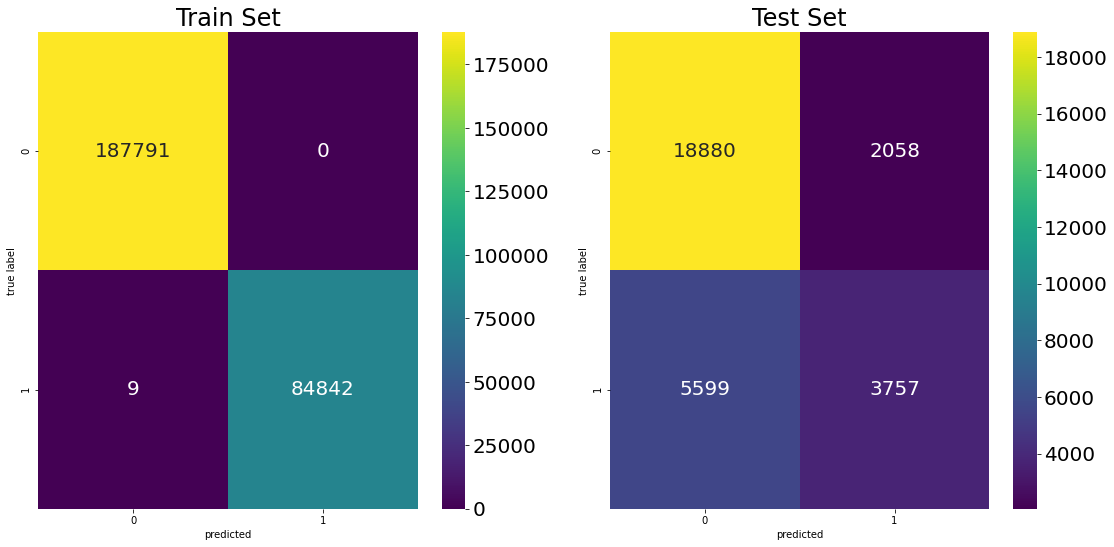

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

rc = {'font.size': 20}
with plt.rc_context(rc):
    sns.heatmap(confusion_matrix(y_train, y_tr_preds), annot=True, fmt='d', cmap='viridis', ax=ax[0])
    ax[0].set_xlabel('predicted')
    ax[0].set_ylabel('true label')
    ax[0].set_title('Train Set')

    sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d', cmap='viridis', ax=ax[1])
    ax[1].set_xlabel('predicted')
    ax[1].set_ylabel('true label')
    ax[1].set_title('Test Set')
    
    plt.tight_layout()

### <u> **Accuracies** </u>

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
train_acc, test_acc = accuracy_score(y_true=y_train, y_pred=y_tr_preds), accuracy_score(y_true=y_test, y_pred=y_preds)

In [145]:
print("Train Acc", "Test Acc", sep='\t')
print("{:.4}\t{:.4f}".format(train_acc, test_acc))

Train Acc	Test Acc
1.0	0.6999


### <u> **F-scores** </u>

In [146]:
IFrame('https://en.wikipedia.org/wiki/F-score', width=800, height=400)

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [148]:
def fbeta_score(pr, rec, beta):
    return (1+(beta**2))*((pr*rec)/(((beta**2)*pr)+rec))

In [149]:
train_prec, test_prec = precision_score(y_true=y_train, y_pred=y_tr_preds), precision_score(y_true=y_test, y_pred=y_preds)

In [150]:
train_recall, test_recall = recall_score(y_true=y_train, y_pred=y_tr_preds), recall_score(y_true=y_test, y_pred=y_preds)

In [151]:
train_f1, test_f1 = f1_score(y_true=y_train, y_pred=y_tr_preds), f1_score(y_true=y_test, y_pred=y_preds)

In [152]:
fbeta_tr_scores = []
fbeta_scores = []
for b in [0.1, 0.5, 1, 2, 10]:
    fbeta_tr_scores.append(fbeta_score(train_prec, train_recall, b))
    fbeta_scores.append(fbeta_score(test_prec, test_recall, b))

In [153]:
print("Metric", "Train", "Test", sep='\t')
print("{:s}\t{:.4f}\t{:.4f}".format("Precision", train_prec, test_prec))
print("{:s}\t{:.4f}\t{:.4f}".format("Recall", train_recall, test_recall))
#print("{:s}\t{:.4f}\t{:.4f}".format("F1-Score", train_f1, test_f1))
for i, b in enumerate([0.1, 0.5, 1, 2, 10]):
    print("F{:s}-Score\t{:.4f}\t{:.4f}".format(str(b), fbeta_tr_scores[i], fbeta_scores[i])) 

Metric	Train	Test
Precision	1.0000	0.5486
Recall	1.0000	0.1673
F0.1-Score	1.0000	0.5365
F0.5-Score	1.0000	0.3768
F1-Score	1.0000	0.2564
F2-Score	1.0000	0.1943
F10-Score	1.0000	0.1684


### <u> **Precision-recall** </u>

In [132]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [133]:
precs_tr, recs_tr, threshs_tr = precision_recall_curve(y_true=y_train, probas_pred=y_tr_probs)
avg_prec_tr = average_precision_score(y_true=y_train, y_score=y_tr_probs)

In [134]:
precs, recs, threshs = precision_recall_curve(y_true=y_test, probas_pred=y_probs)
avg_prec = average_precision_score(y_true=y_test, y_score=y_probs)

In [135]:
avg_prec_tr, avg_prec

(1.0, 0.5936992585369412)

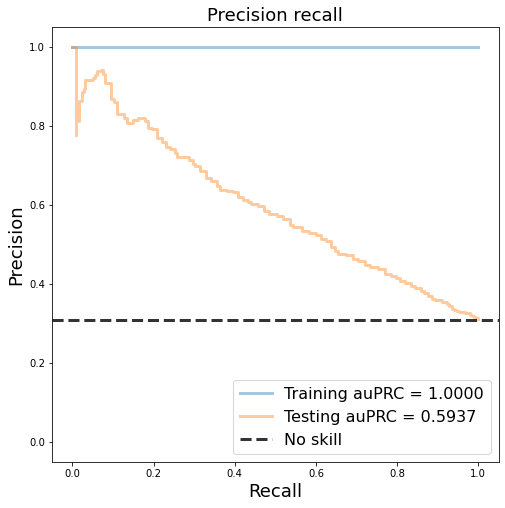

In [136]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.step(recs_tr, precs_tr, where='post', lw=3, alpha=0.4, label='Training auPRC = %0.4f' % (avg_prec_tr))
ax.step(recs, precs, where='post', lw=3, alpha=0.4, label='Testing auPRC = %0.4f' % (avg_prec))
ax.axhline(len(y_test[y_test==1])/len(y_test), linestyle='--', lw=3, color='k', label='No skill', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('Recall', fontsize=18)
ax.set_ylabel('Precision', fontsize=18)
ax.set_title('Precision recall', fontsize=18)
ax.legend(loc="lower right", fontsize=16);

### <u> **Reciever operating characteristic** </u>

In [105]:
from sklearn.metrics import roc_curve, auc

In [106]:
fprs_tr, tprs_tr, threshs_tr = roc_curve(y_true=y_train, y_score=y_tr_probs)
roc_auc_tr = auc(fprs_tr, tprs_tr)

In [107]:
fprs, tprs, threshs = roc_curve(y_true=y_test, y_score=y_probs)
roc_auc = auc(fprs, tprs)

In [108]:
roc_auc_tr, roc_auc

(0.9022159347744443, 0.6612879551005468)

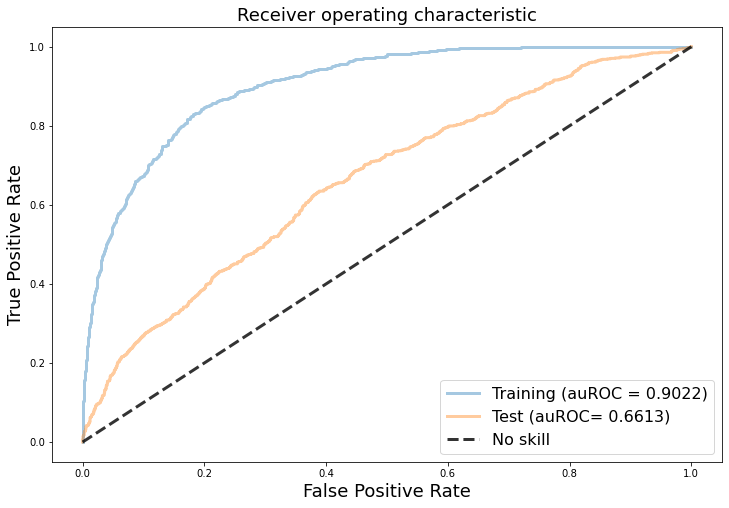

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(fprs_tr, tprs_tr, lw=3, alpha=0.4, label='Training (auROC = %0.4f)' % (roc_auc_tr))
ax.plot(fprs, tprs, lw=3, alpha=0.4, label='Test (auROC= %0.4f)' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=3, color='k', label='No skill', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_title('Receiver operating characteristic', fontsize=18)
ax.legend(loc="lower right", fontsize=16);

## Save the classifier

In [ ]:
import pickle

In [219]:
#file = '../data/2021_OLS_Library/RF/0.18-0.4_mixed-encoding_RF-clf_randomCV.pickle'
#file = '0.18-0.4_mixed_RF-clf.pickle'
#file = '0.18-0.4_mixed_2.0_RF-clf.pickle'
file = '0.18-0.4_mixed_RF-clf_hyperopt.pickle'

In [220]:
pickle.dump(clf, open(file, 'wb'))

In [84]:
test_load = pickle.load(open(file, 'rb'))
np.unique(test_load.predict(X_test), return_counts=True)

(array([0, 1]), array([24479,  5815]))